# <font color='green'>Approximation</font> of linear function using <font color='green'>batch gradient descent</font>

#### Import libraries

In [1]:
import torch
from tqdm import tqdm
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


#### Plotting function

In [2]:
def show_linear_plot(X: np.ndarray, y: np.ndarray, X_lin: np.ndarray, y_lin: np.ndarray, label:str, pts_type='o',
                     pts_color='r', pts_label='Points', pts_size=10, plot_color='b', plot_type='-', plot_linew=2) -> None:
    fig, _ = plt.subplots(figsize=(9, 7))
    
    plt.plot(X_lin, y_lin, plot_color+plot_type, label=label, linewidth=plot_linew)
    
    plt.plot(X, y, pts_color+pts_type, markersize=5, label=pts_label)
    plt.title('ƒ(x) approximation', fontsize=25)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.minorticks_on()
    plt.legend(loc='best', fontsize=13)
    fig.tight_layout()
    plt.show()

## **Gradient descent**

In [3]:
def clip_grad(grad: torch.Tensor, max_grad_len: float) -> torch.Tensor:
    grad_len = torch.norm(grad)
    if grad_len < max_grad_len:
        return grad, grad_len
    return (grad / grad_len) * max_grad_len, grad_len

def grad_desc(f, X0s: list, N=10001, alpha=.01, step=1, max_grad_len=1.) -> list:
    XMins = []
    for x0 in tqdm(X0s):
        for _ in range(N):
            X = torch.tensor([x0], dtype=torch.float, requires_grad=True)
            y = f(X)
            y.backward()
            clipped_grad, _ = clip_grad(X.grad, max_grad_len)
            x0 -= clipped_grad.item() * alpha * step
        XMins.append(x0)
    return XMins



f = lambda x: x**8 - x**5 - 2*x**2 + 3
X0s = [-20., -10., -5., 5., 10., 20.]
XMins = grad_desc(f, X0s)
xMin = min(XMins, key=lambda x: f(x))
print(f'There is the global minimum of the function, if x = {xMin} and y = {f(xMin)}')

100%|██████████| 6/6 [00:10<00:00,  1.81s/it]

There is the global minimum of the function, if x = 1.0277502155304583 and y = 0.9855934474849359


## **$ f(x) = kx $**

#### Approximation function

In [4]:
def approx_k(X: torch.Tensor, y: torch.Tensor, alpha=.01, step=1, max_grad_len=1., desired_grad_len=1e-3) -> tuple:
    k = torch.tensor([1], dtype=torch.float, requires_grad=True)
    grad_len = desired_grad_len + 1
    N = 0
    while grad_len > desired_grad_len:
        N += 1
        yy = k * X
        mse = ((yy - y)**2).mean()
        mse.backward()
        clipped_grad, grad_len = clip_grad(k.grad, max_grad_len)
        k =  (k - clipped_grad * alpha * step).clone().detach().requires_grad_(True)
    return k.item(), N

#### Test




			Result:

k = 7.527271270751953		658 batches





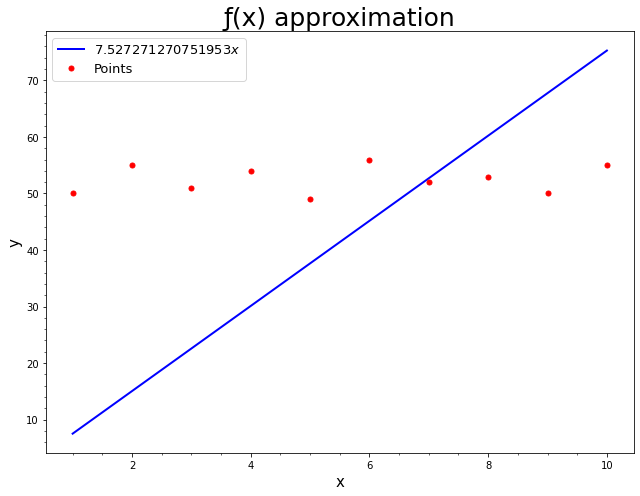

In [5]:
X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=torch.float, requires_grad=True)
y = torch.tensor([50, 55, 51, 54, 49, 56, 52, 53, 50, 55], dtype=torch.float, requires_grad=True)
k, N = approx_k(X, y)
print(f'''
================================================================================
\n\n\t\t\tResult:\n\nk = {k}\t\t{N} batches\n\n\n
================================================================================''')

X = X.clone().detach().requires_grad_(False)
y = y.clone().detach().requires_grad_(False)
X_lin = np.linspace(X.min(), X.max(), 1000)
y_lin = k * X_lin
label = f'$ {k}x $'
show_linear_plot(X, y, X_lin, y_lin, label)

## $ f(x) = kx + b $

#### Approximation function

In [6]:
def approx_kb(X: torch.Tensor, y = torch.Tensor, alpha=.01, step=1, max_grad_len=1., desired_grad_len=1e-3) -> tuple:
    kb = torch.tensor([1, 0], dtype=torch.float, requires_grad=True)
    grad_len = desired_grad_len + 1
    N = 0
    while grad_len > desired_grad_len:
        N += 1
        yy = kb[0] * X + kb[1]
        mse = ((yy - y)**2).mean()
        mse.backward()
        clipped_grad, grad_len = clip_grad(kb.grad, max_grad_len)
        kb = (kb - clipped_grad * alpha * step).clone().detach().requires_grad_(True)
    return kb[0].item(), kb[1].item(), N

#### Test




				Result:

k = 0.127608984708786		b = 51.79766082763672		7100 batches





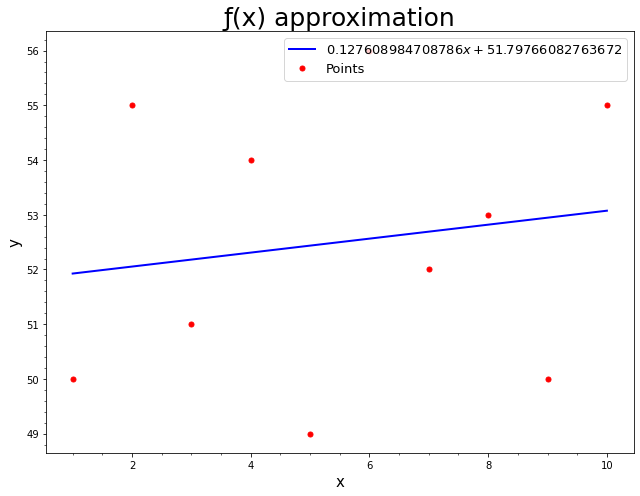

In [7]:
X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=torch.float)
y = torch.tensor([50, 55, 51, 54, 49, 56, 52, 53, 50, 55], dtype=torch.float)
k, b, N = approx_kb(X, y)
print(f'''
================================================================================
\n\n\t\t\t\tResult:\n\nk = {k}\t\tb = {b}\t\t{N} batches\n\n\n
================================================================================''')

X = X.clone().detach().requires_grad_(False)
y = y.clone().detach().requires_grad_(False)
X_lin = np.linspace(X.min(), X.max(), 1000)
y_lin = k * X_lin + b
label = f'$ {k}x + {b} $'
show_linear_plot(X, y, X_lin, y_lin, label)

## $ f(x) = ksin(x) + b $

#### Approximation function

In [8]:
def approx_ksinb(X: torch.Tensor, y = torch.Tensor, alpha=.01, step=1, max_grad_len=1., desired_grad_len=1e-3) -> tuple:
    kb = torch.tensor([1, 0], dtype=torch.float, requires_grad=True)
    grad_len = desired_grad_len + 1
    N = 0
    while grad_len > desired_grad_len:
        N += 1
        yy = kb[0] * torch.sin(X) + kb[1]
        mse = ((yy - y)**2).mean()
        mse.backward()
        clipped_grad, grad_len = clip_grad(kb.grad, max_grad_len)
        kb = (kb - clipped_grad * alpha * step).clone().detach().requires_grad_(True)
    return kb[0].item(), kb[1].item(), N

#### Test




				Result:

k = -0.21204200387001038		b = 52.5297966003418		6054 batches





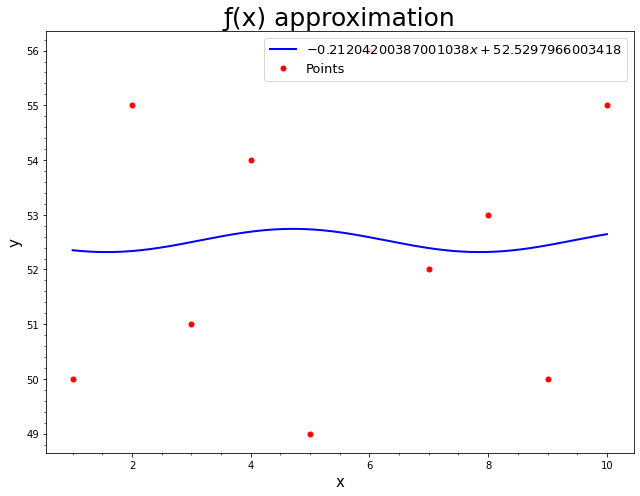

In [9]:
X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=torch.float, requires_grad=True)
y = torch.tensor([50, 55, 51, 54, 49, 56, 52, 53, 50, 55], dtype=torch.float, requires_grad=True)
k, b, N = approx_ksinb(X, y)
print(f'''
================================================================================
\n\n\t\t\t\tResult:\n\nk = {k}\t\tb = {b}\t\t{N} batches\n\n\n
================================================================================''')

X = X.clone().detach().requires_grad_(False)
y = y.clone().detach().requires_grad_(False)
X_lin = np.linspace(X.min(), X.max(), 1000)
y_lin = k * np.sin(X_lin) + b
label = f'$ {k}x + {b} $'
show_linear_plot(X, y, X_lin, y_lin, label)